# Test the Bayesian isochrone code

In [2]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

agepro_dir = '/home/dingshandeng/github/DataCalibration/'
sys.path.append(os.path.join(agepro_dir, 'AGE-PRO-analysis/', 'Image_Plots/'))
import sources as ss

import scipy.io

In [3]:
github_dir = '/home/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))
# import ysoisochrone.utils as utils
# import ysoisochrone.bayesian as bayesian
# import ysoisochrone.plotting as plotting
import ysoisochrone

### Readin the data files for the dataset

In [4]:
AP_data_dir = '/home/dingshandeng/github/DataCalibration/AGE-PRO-analysis/Data_analysis_n_General_Plots'

df_AP_LP_st = pd.read_csv(AP_data_dir+'/data/Table_AGEPRO_Lupus_stellar_parameters.csv')

file_dir_Manara = os.path.join(agepro_dir, 'ManaraPPVII-data_and_others/')
agepro_alcala_data = pd.read_csv(os.path.join(file_dir_Manara, 'Alcala+2017_table_A2_stellar_properties - Sheet2.csv'))

teff_err = np.zeros(len(agepro_alcala_data))
luminosity_star_err = np.zeros(len(agepro_alcala_data))
mstar_err = np.zeros(len(agepro_alcala_data))
for ii in agepro_alcala_data.index:
    luminosity_star_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Lstar (err)[Lsun]'].split('(')[1][0:-1])
    teff_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Teff (err)[K]'].split('(')[1][0:-1])
    mstar_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Mstar(S00) (err)[Msun]'].split('(')[1][0:-1])

df_prop = copy.deepcopy(df_AP_LP_st)

# df_prop['Source'] = df_prop['Source']
df_prop['Teff'] = df_prop['Teff_xs']
df_prop['Luminosity'] = df_prop['Lstar_xs_DR3']
df_prop['e_Teff'] = teff_err
df_prop['e_Luminosity'] = luminosity_star_err
# print(df_prop.columns)

# For AGE-PRO UScous targets
toobright = [] # ['0']  
toofaint = [] # ['0']
median_age = 1.0 # Myrs	

# only select part of the data
# df_prop = df_prop.loc[:2]

# df_output = df_prop.loc[:, ['Source', 'Teff', 'e_Teff', 'Luminosity', 'e_Luminosity']]
# df_output.to_csv('./target_info.csv', index=False)

### Plot the HR for each isochrones

check the MIST tracks

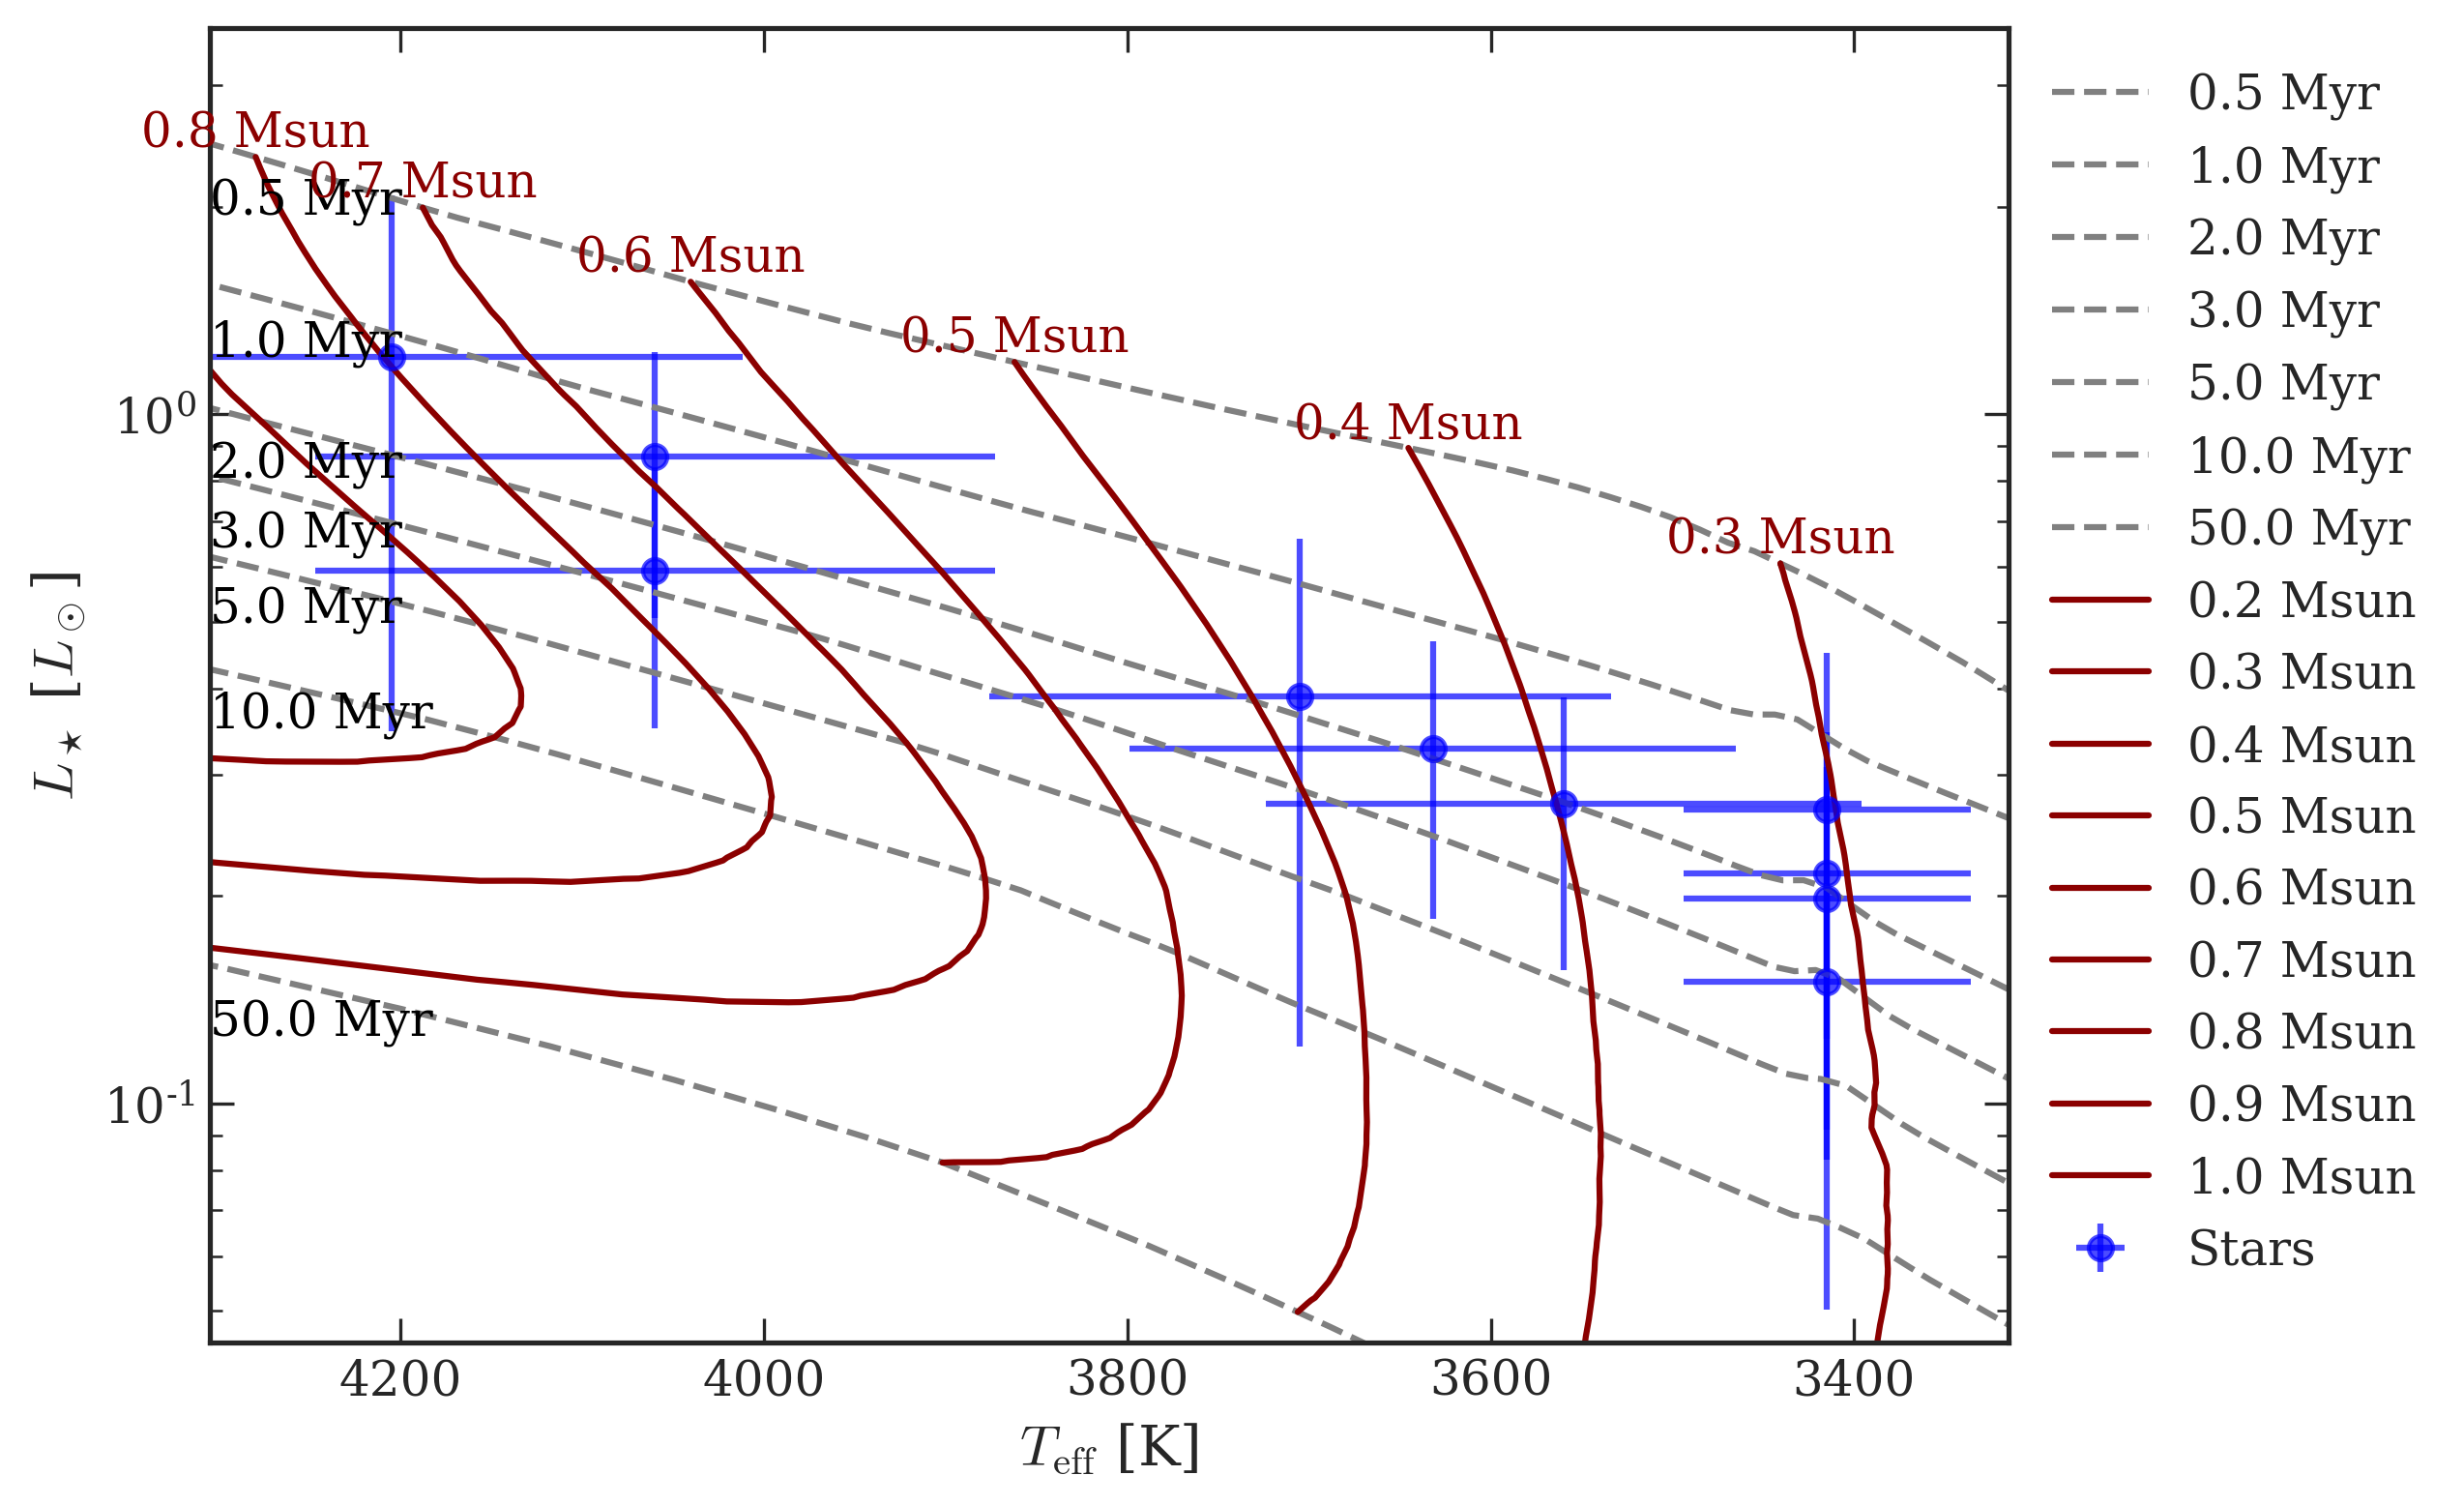

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/MIST_v1p2_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('custome', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)
# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       masses_to_plot=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# ax.set_xlim(4500, 3000)
# ax.set_ylim(0.01, 5.0)

plt.show()

check the PARSECv1.2 tracks

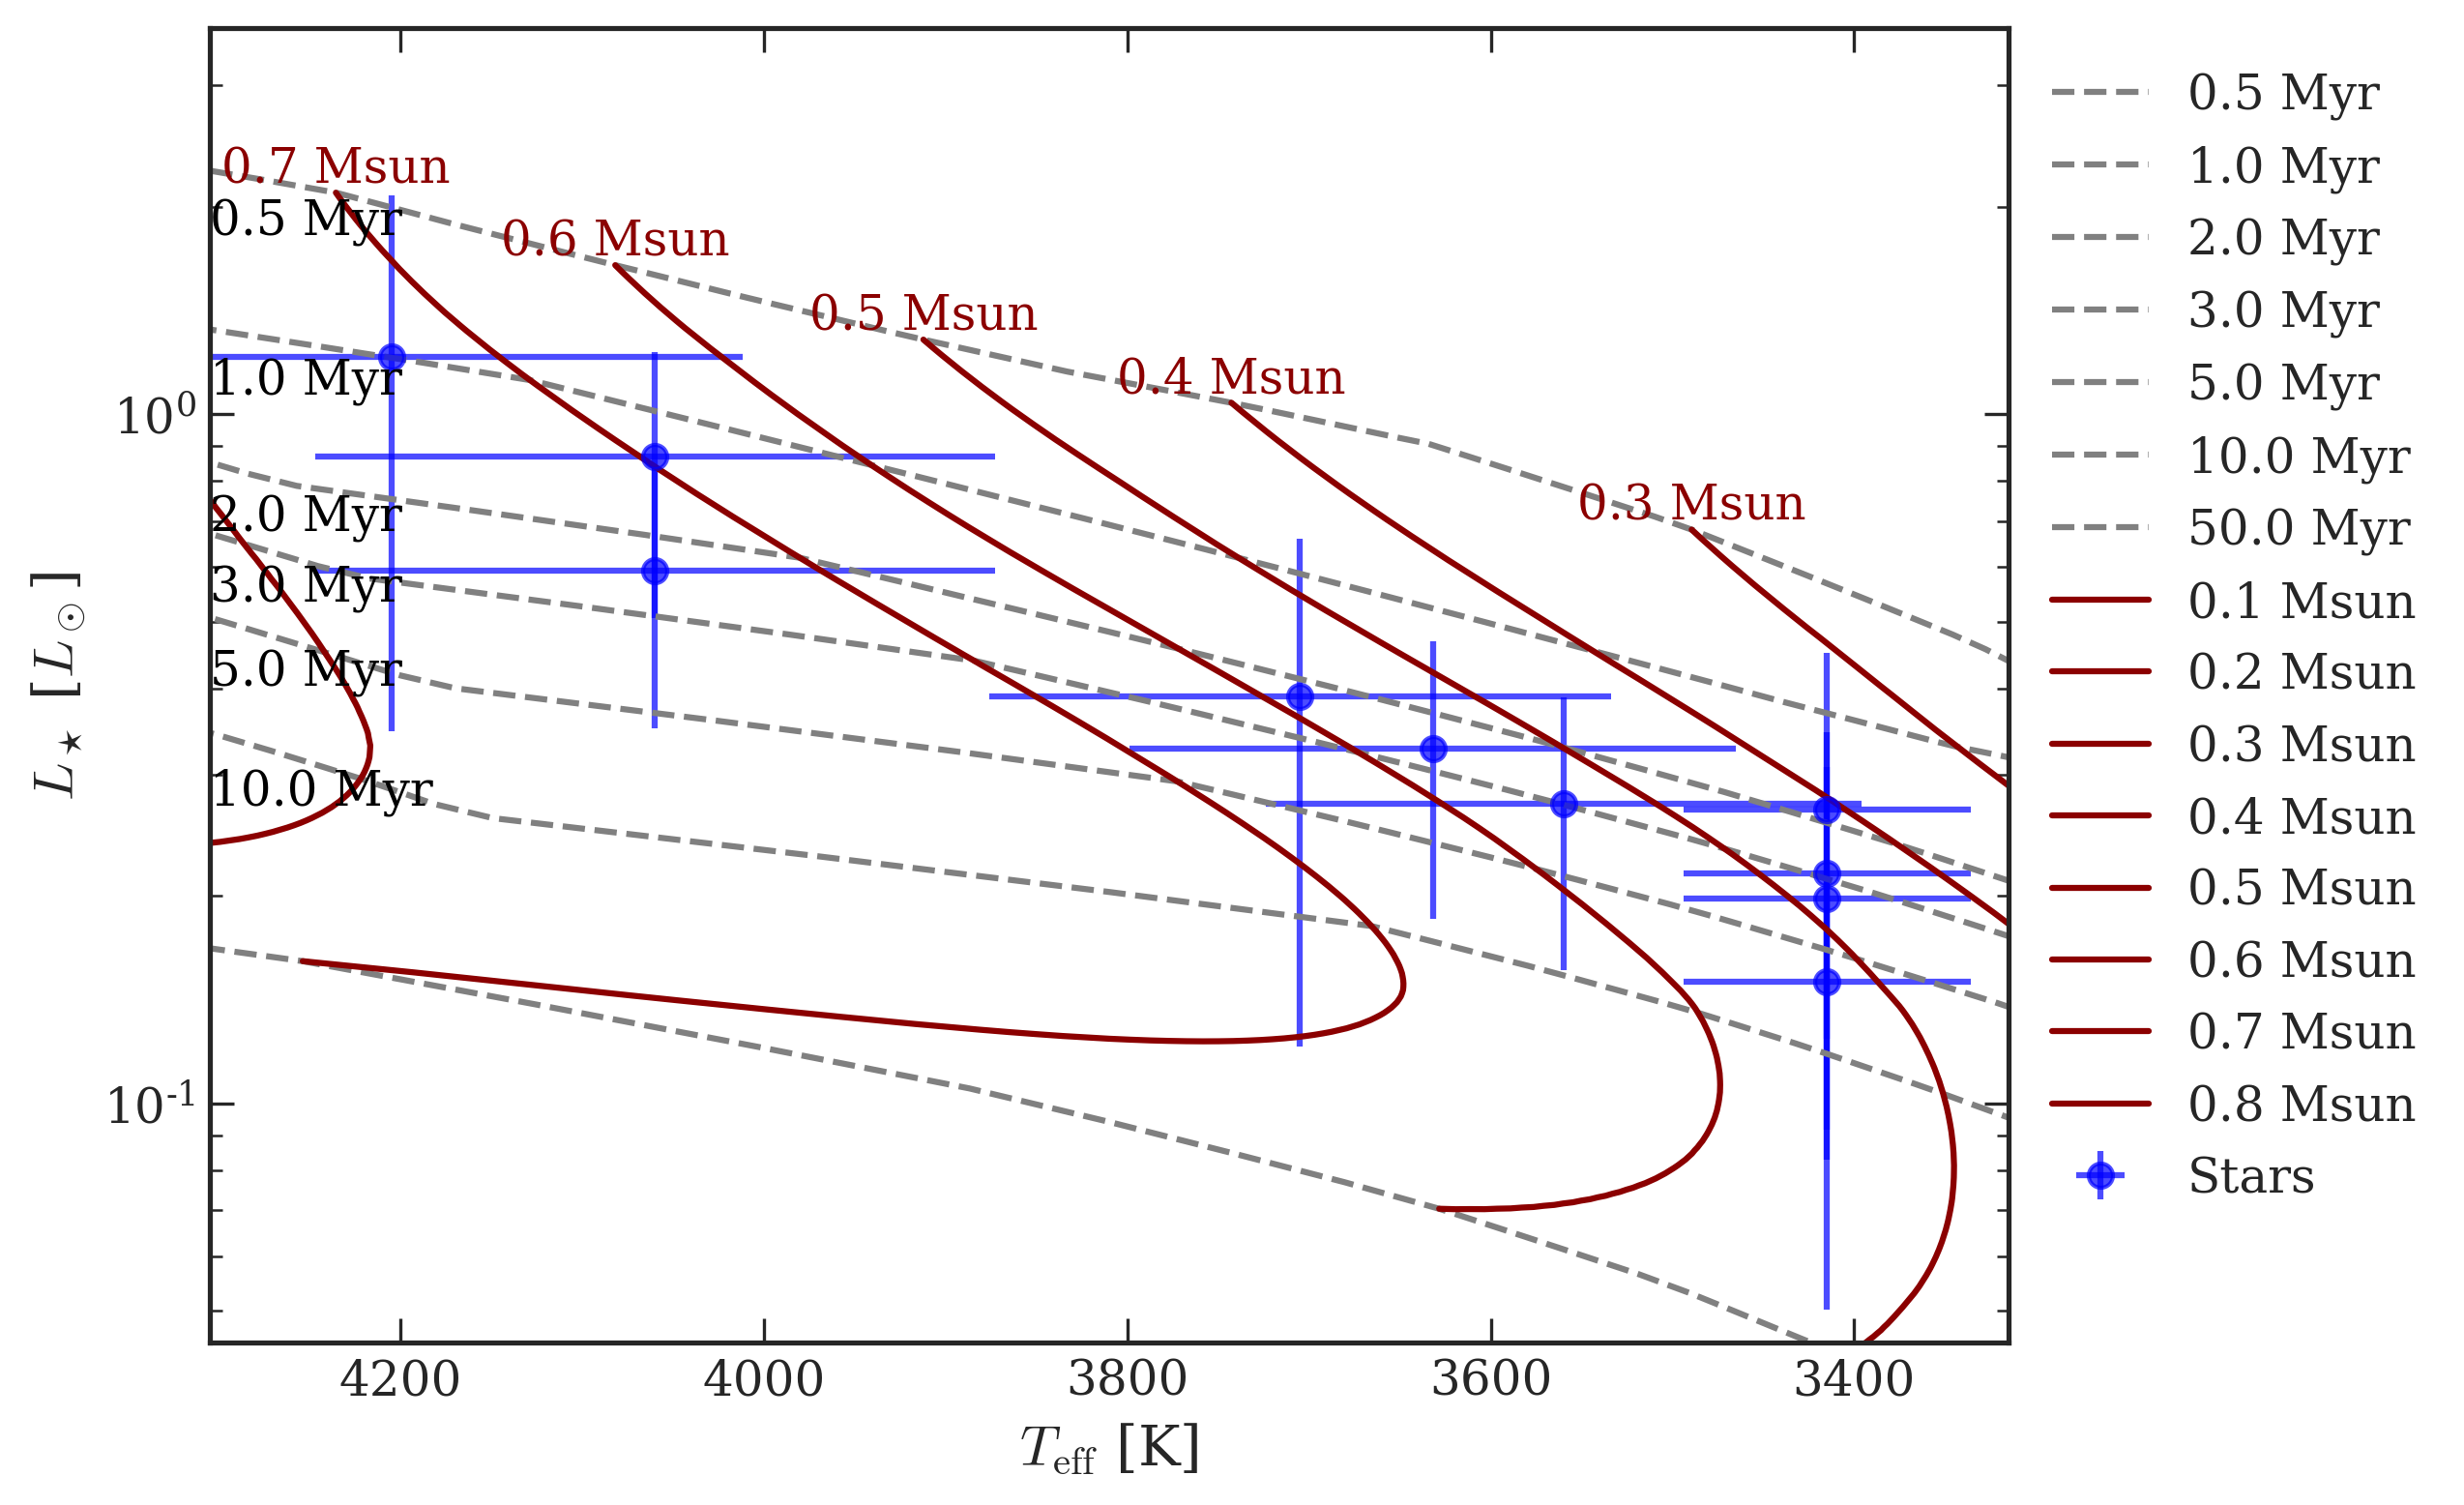

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/PARSECv1p2_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('custome', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)
# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       ages_to_plot=[0.50e6],
#                                       masses_to_plot=[0.4, 0.5])

# ax.set_xlim(4500, 3000)
# ax.set_ylim(0.01, 5.0)

plt.show()

check the PARSEC v2.0 tracks

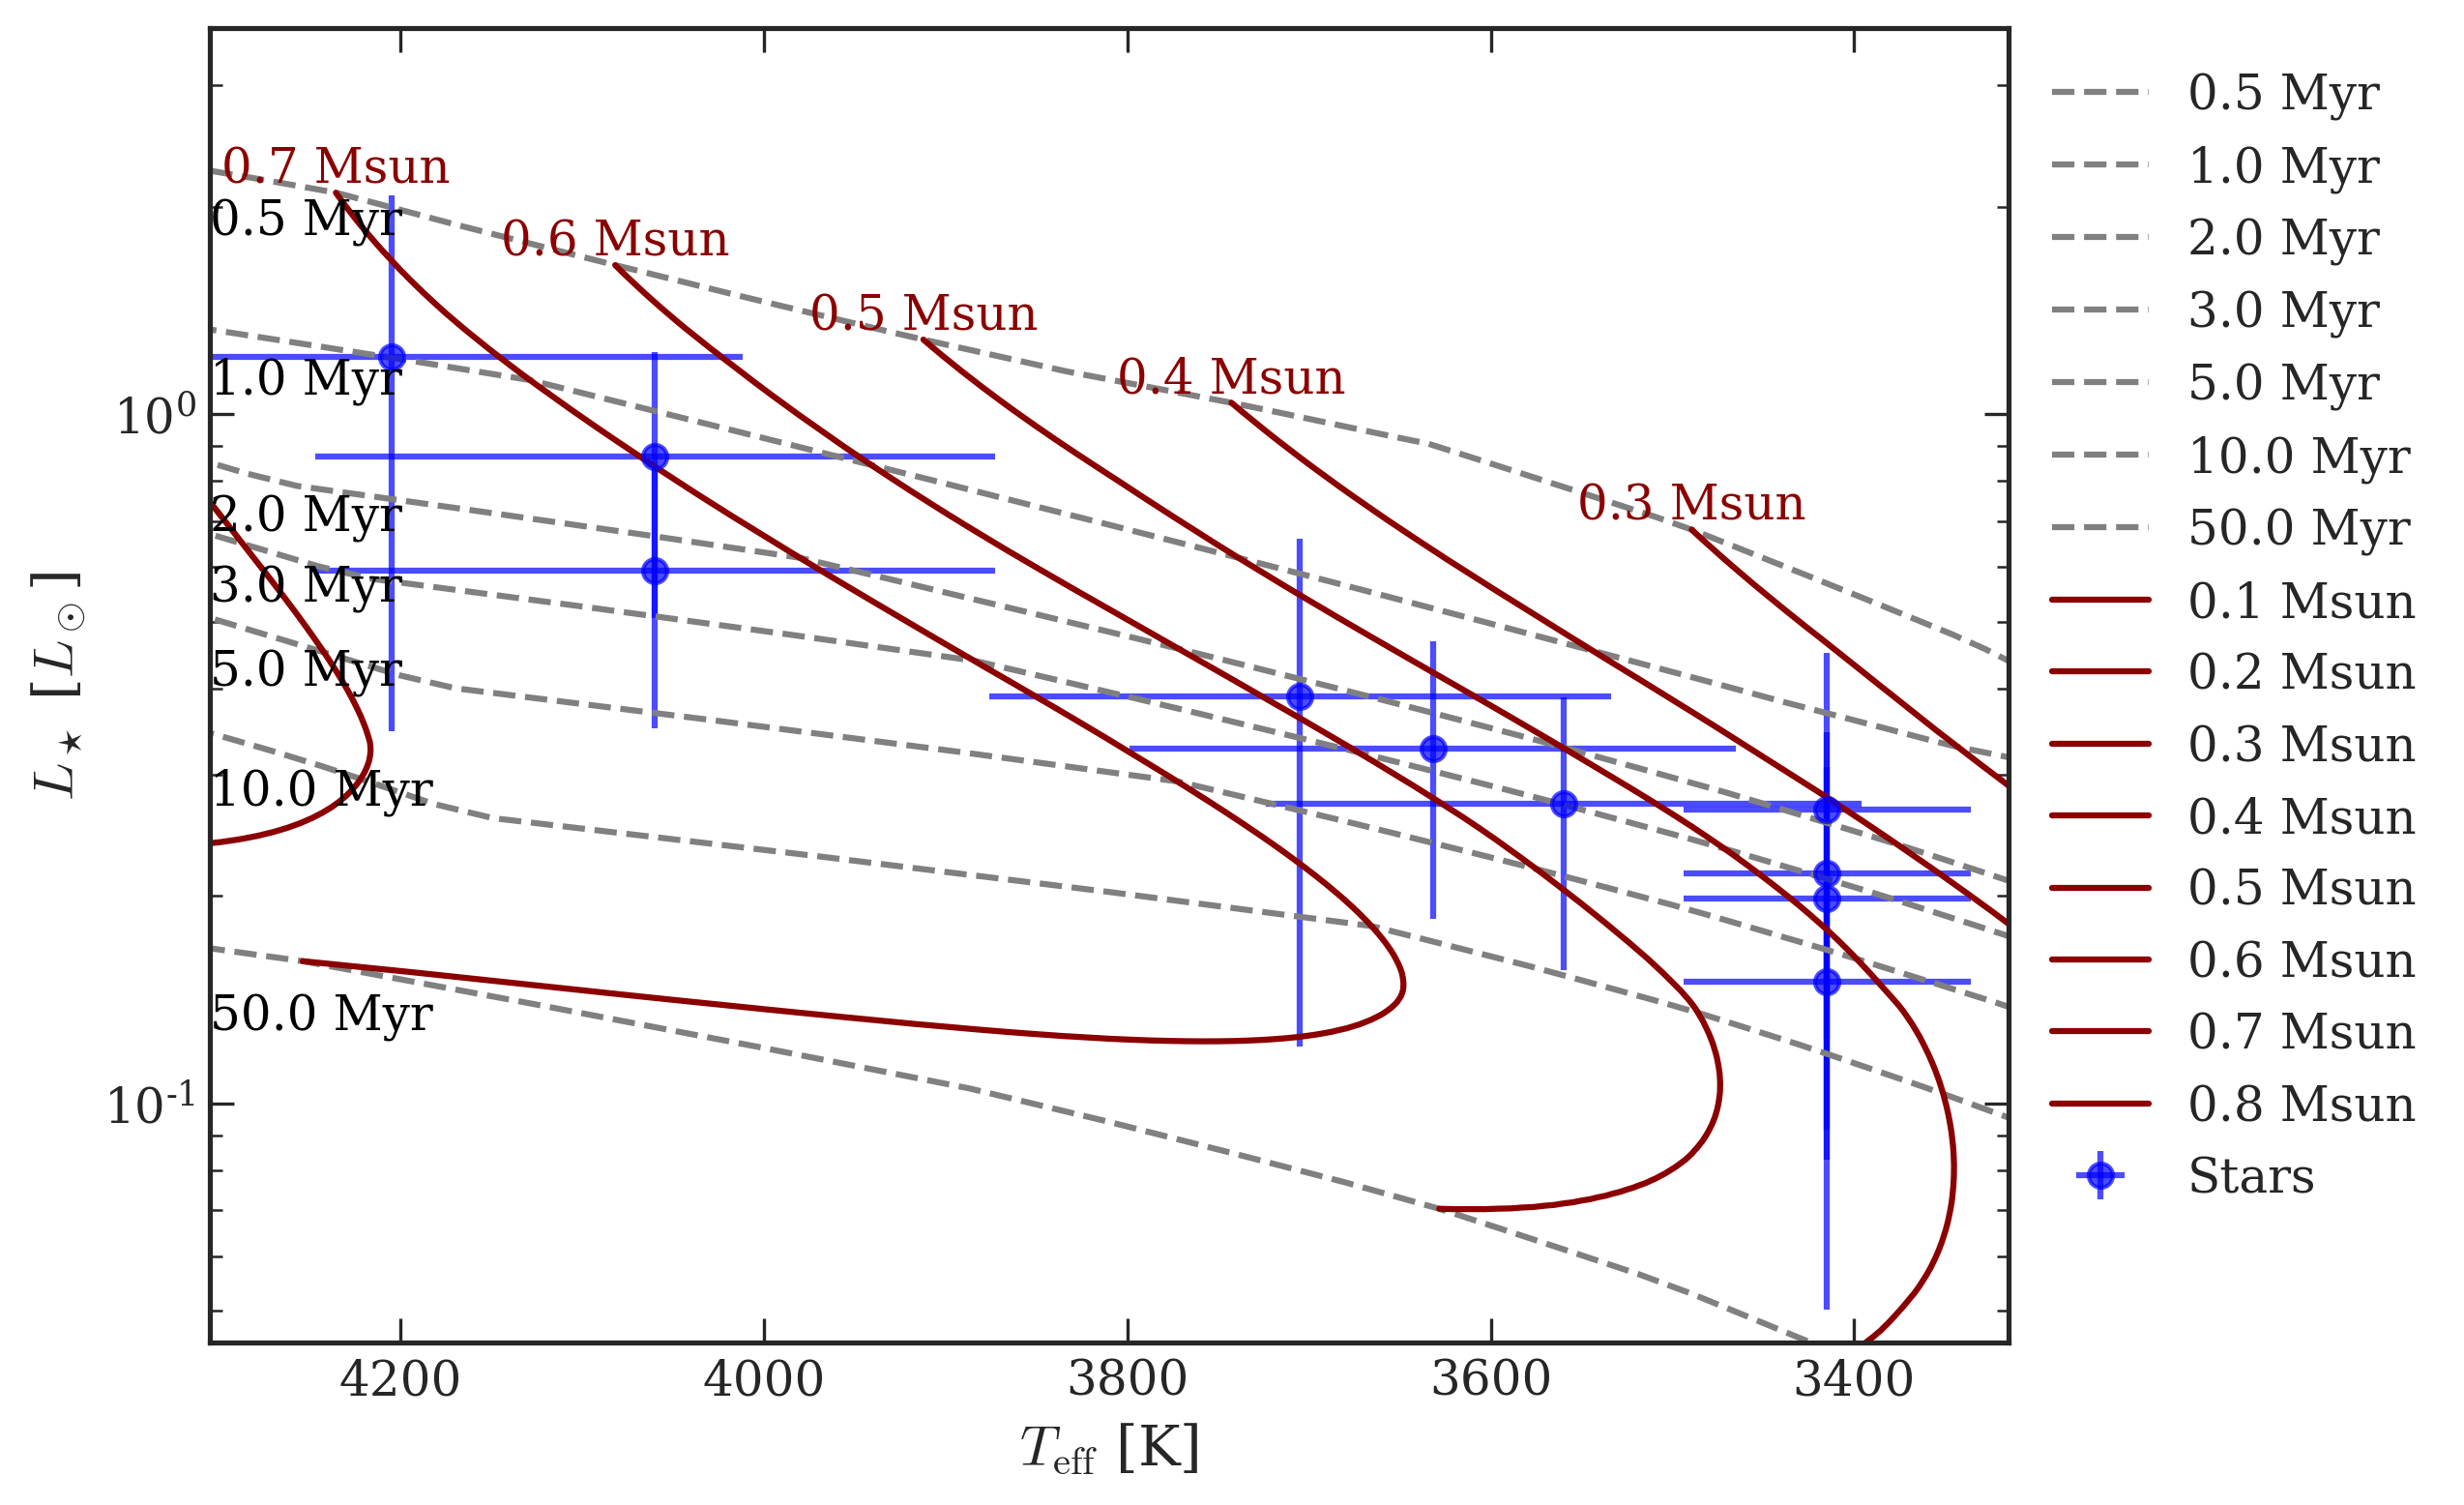

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/PARSECv2p0_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('custome', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)
# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       ages_to_plot=[0.50e6],
#                                       masses_to_plot=[0.4, 0.5])

# ax.set_xlim(4500, 3000)
# ax.set_ylim(0.01, 5.0)

plt.show()

for Feiden tracks
there are currently three of them

```
# Load the saved .mat file
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat')
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat')
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_AgeMassGrid_iso_YSO_matrix.mat') # this one has some problem; ignore for now
```

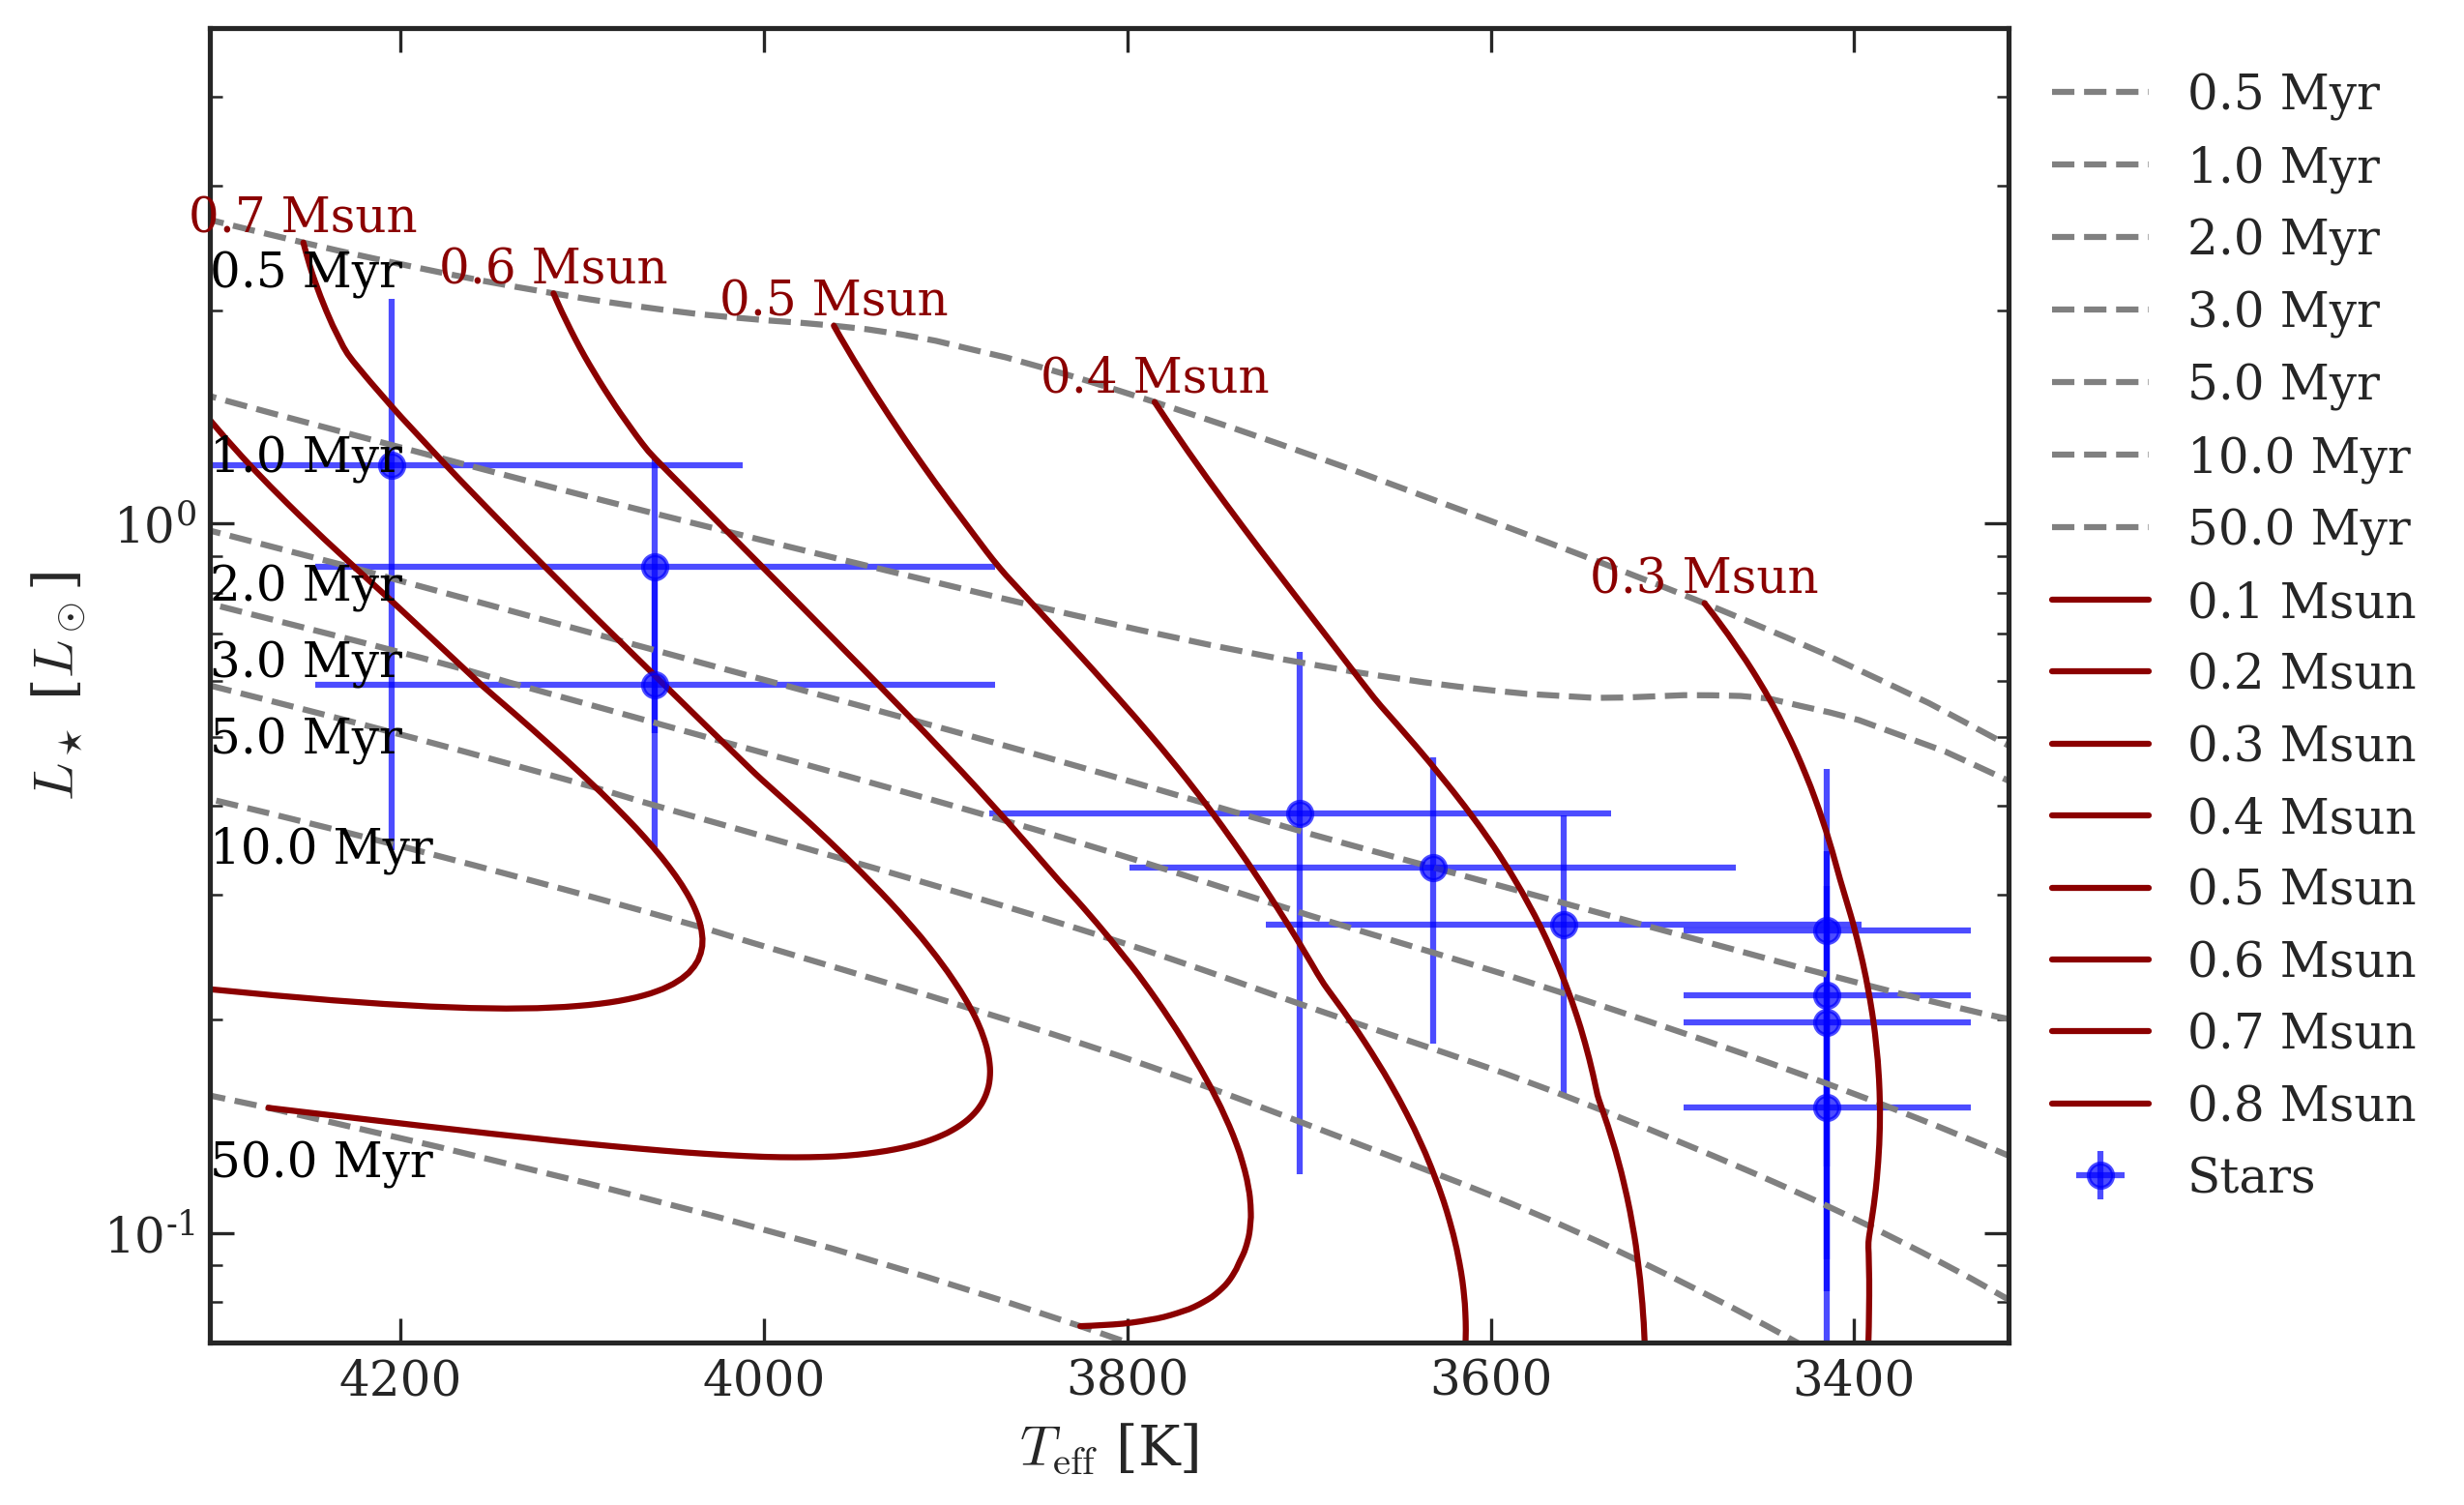

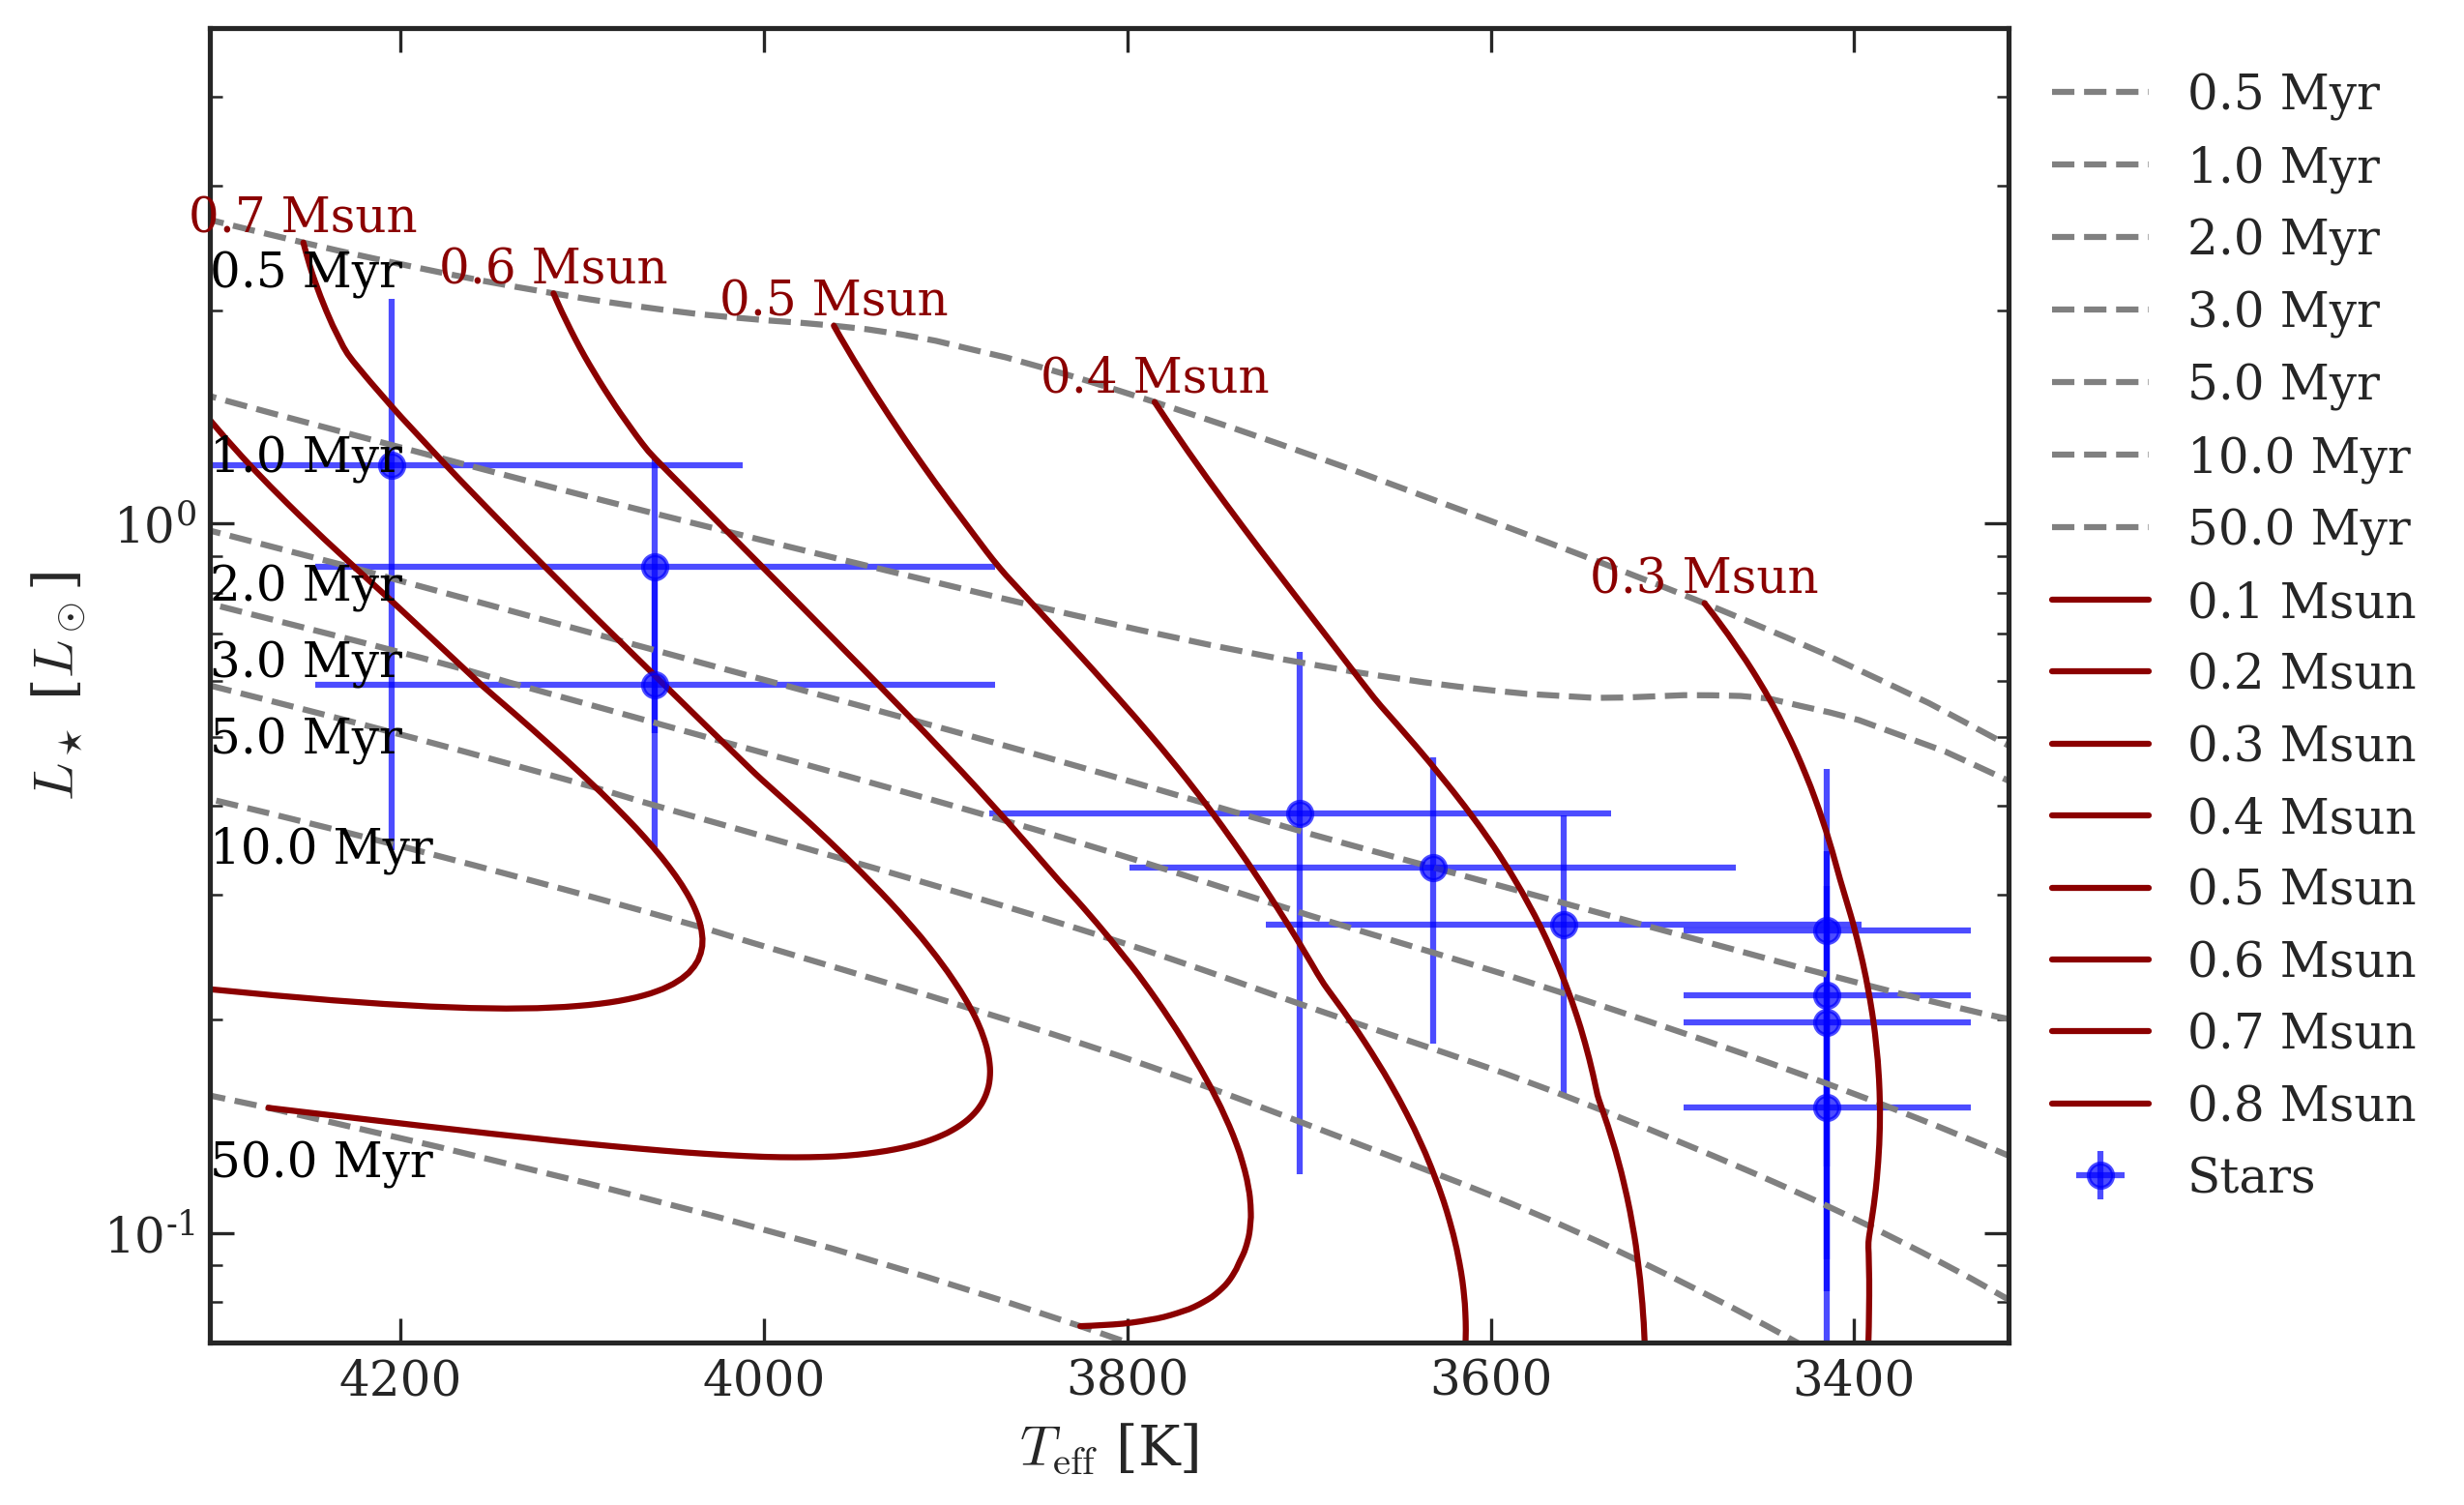

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('custome', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)

ax.set_ylim(0.07, 5.0)

"""Figure 2"""

fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('custome', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)

ax.set_ylim(0.07, 5.0)

plt.show()

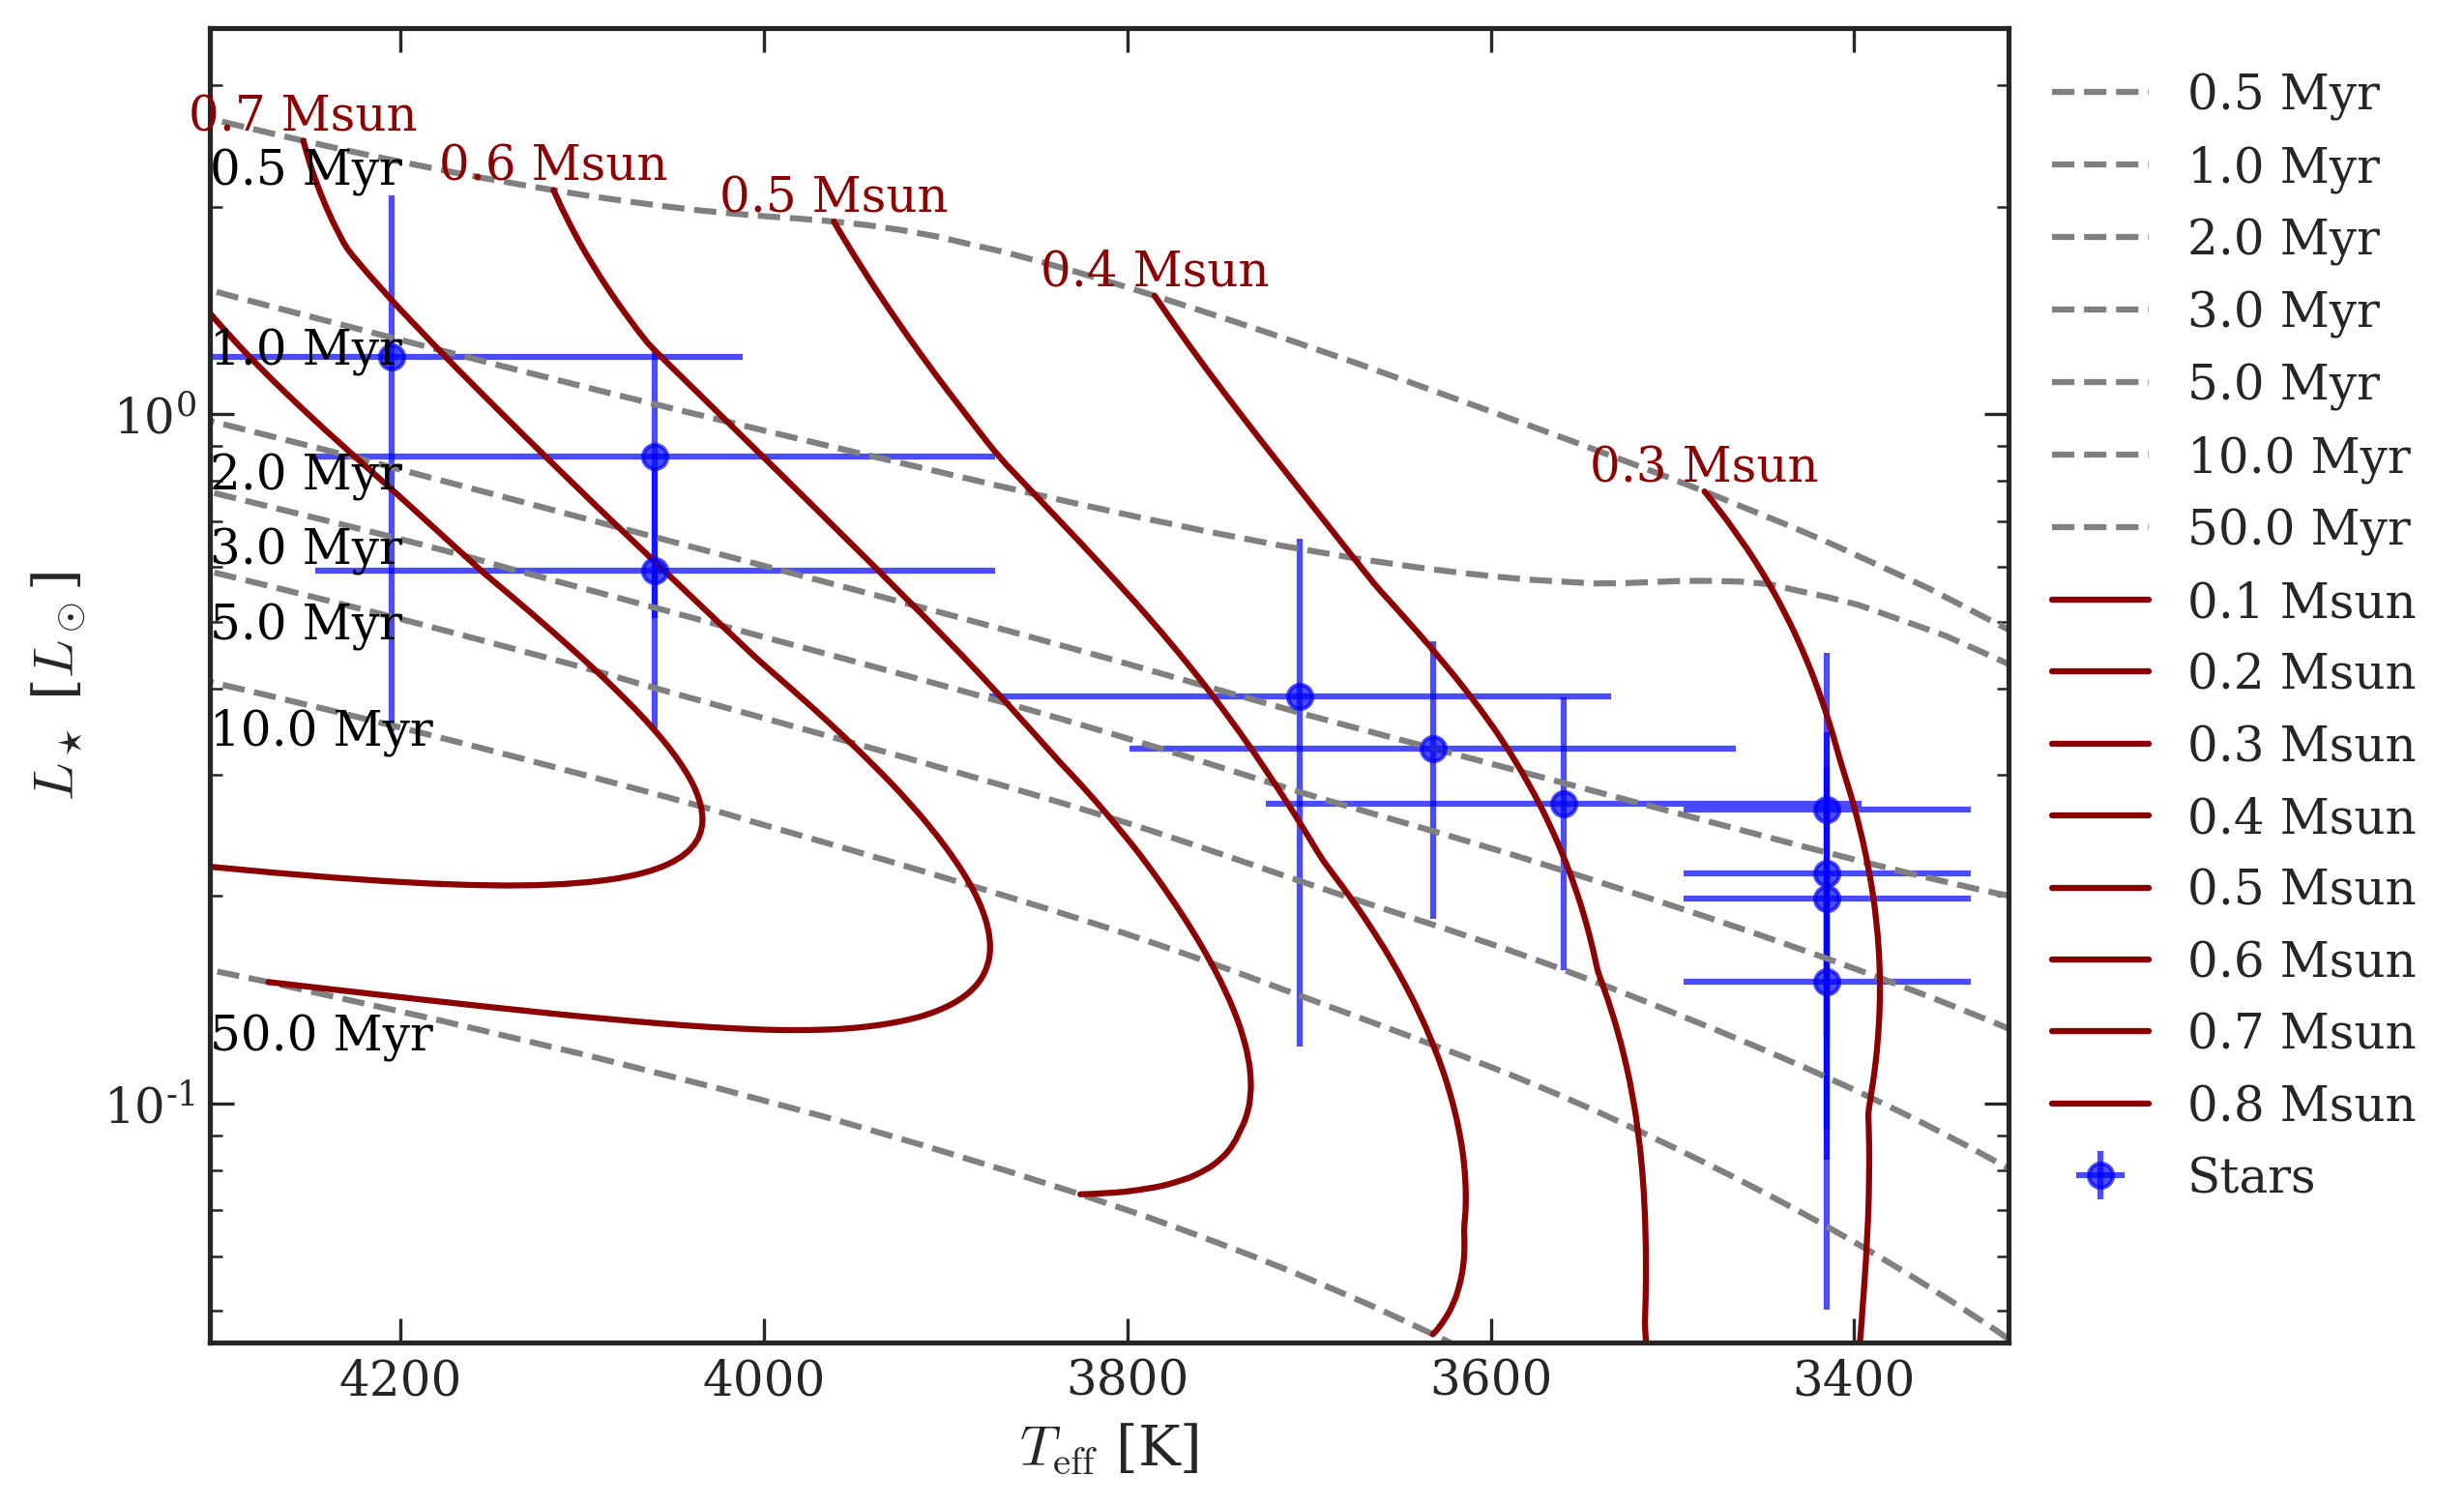

1

In [60]:
isochrone = ysoisochrone.isochrone.Isochrone()

isochrone.set_tracks('Feiden2016')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop)
# ysoisochrone.plotting.plot_hr_diagram(isochrone)

## For Baraffe tracks

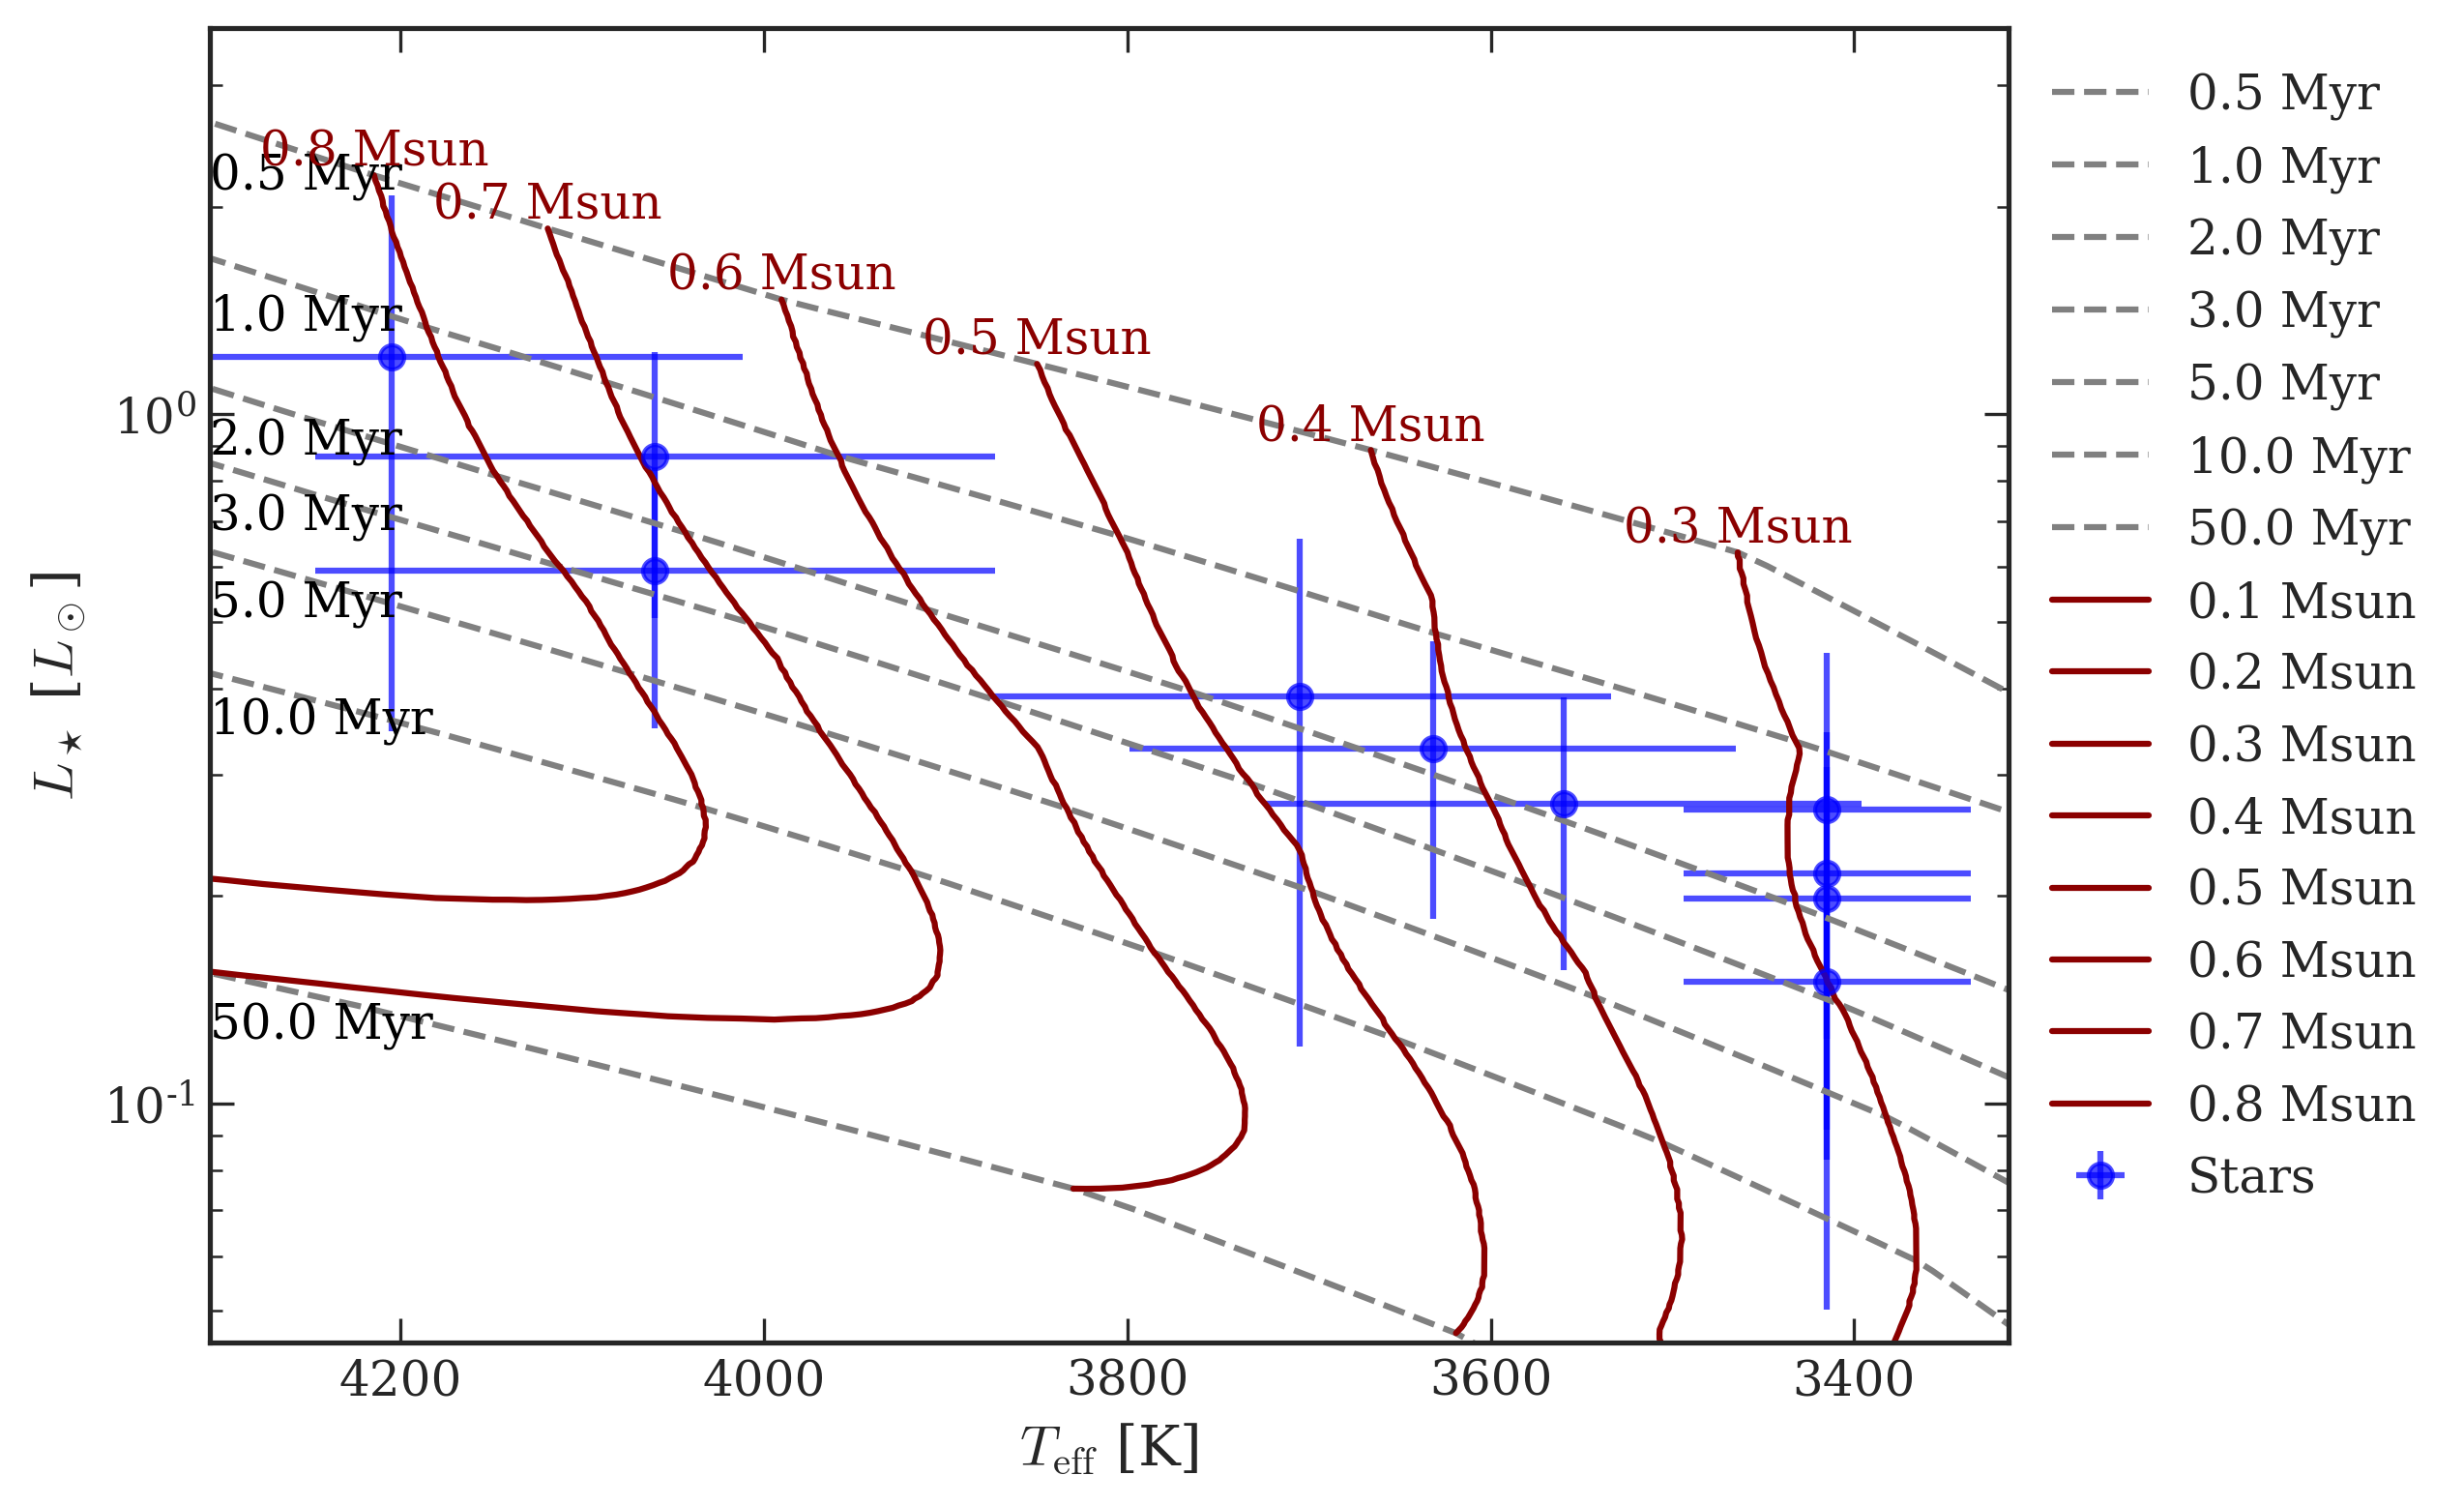

1

In [61]:
# Initialize the isochrone class with default data directory
isochrone = ysoisochrone.isochrone.Isochrone()

isochrone.set_tracks('Baraffe2015')

# fig, ax = plt.subplots(figsize=(8, 6))
ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop)
# ax.set_ylim(0.07, 3.0)
# plt.show()